# Introduction
Welcome to Practical 4 for Graph Representation Learning (MT22). In this practical, we will focus on the over-smoothing phenomenon described in Lecture 10. We will be using [PyTorch](https://pytorch.org/docs/stable/index.html) and [PyG](https://pytorch-geometric.readthedocs.io/en/latest/) for our experiments.

The notebook is divided into sections, each of which comes with complete or partially completed code. Before each snippet of code there will be a description of what we are about to implement. The sections of code you need to complete are marked as **Tasks**.

Please ensure that you operate within the framework given in the notebook and bring any questions you may have to the practical demonstrators. We suggest that you **DO NOT** edit code that is a part of the framework, since this will make it more difficult for demonstrators to assist if your code is broken.

Since we are working in a Jupyter Notebook, the code is very interactive. When you're stuck on something, try adding a new block of code below what you're working on and using it to debug your code.

###Part 0. Set up dependencies
Run the following blocks of code to install the required packages.

In [ ]:
!python -c "import torch; print(torch.__version__)"

1.12.1+cu113


In [ ]:
%%capture
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

### Part 1. Oversmoothing

This part aims to investigate oversmoothing: we will consider different number of layers and visualise the corresponding node embeddings. Specifically, we will experiment using the following dataset and methods::

1.   Dataset: CORA
2.   Model: Graph Convolutional Network
3.   Dimensionality reduction method: T-SNE

### A. Model Implementation and Training

#### a. Import required packages

Please run the below code block to import the required python packages. It is recommended to use `GCNConv` layer from `torch_geometric.nn` as we had already implemented GNN from scratch in **Practical 2**. If you prefer to use your own GCN layer, please make sure it works within the pre-defined framework below. 

In [ ]:
import torch
import os
import typing
import torch_geometric

import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.datasets as datasets

from torch_geometric.nn import GCNConv

b. Load CORA dataset

We will use `torch_geometric.datasets` to load the `Cora` dataset for node classification, which consists of 2,708 nodes, 10,556 edges, 1,433 features, and 7 classes.

In [ ]:
dataset = datasets.Planetoid(
    root="./",
    name='Cora',
    split="public",
    transform=torch_geometric.transforms.GCNNorm()
  )
print(dataset.data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


Processing...
Done!


`dataset.data.x` : input node features

`dataset.data.edge_index` : A sparce adjacent matrix with the size of *2 x n_edge*.
`dataset.data.y` : target labels

`dataset.data.train_mask` : boolean mask indicating whether an index belongs to training data

`dataset.data.val_mask` : boolean mask indicating whether an index belongs to validation data

`dataset.data.test_mask` : boolean mask indicating whether an index belongs to test data

#### c. Task 1) Setup graph convolutional network for node classification
Define a GCN class for a node classification that takes five inputs: *input_dim*, *hid_dim*, *n_class*, *n_layers*, and *dropout_ratio*. 

- Note that the `forward` function should return a Tensor object: **logits** and the `generate_node_embeddings` fuction should return a Tensor object: **node_embeddings**, which is the representation of the last layer. 
- For the case when the *n_layers=0*, implement a single feed-forward network.
- Use `F.relu` and `F.dropout` at the end of each layer.


In [ ]:
class GCN(nn.Module):
  def __init__(
      self,
      input_dim: int,
      hid_dim: int,
      n_classes: int,
      n_layers: int,
      dropout_ratio: float = 0.3):
    super(GCN, self).__init__()
    """
    Args:
      input_dim: input feature dimension
      hid_dim: hidden feature dimension
      n_classes: number of target classes
      n_layers: number of layers
      dropout_ratio: dropout_ratio
    """
    ## ------ Begin Solution ------ ##

    ## ------ End Solution ------ ##

  def forward(self, X, A) -> torch.Tensor:
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

  def generate_node_embeddings(self, X, A) -> torch.Tensor:
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##
  
  def param_init(self):
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

#### c. Task 2) Implement `train` and `evaluate` functions for training a node classification model.

- Apply **Early-stopping**: stop training if the validation accuracy decreases during *k* consecutive epochs.
- Use **Adam optimizer** for training.
- Use **evaluate** function for calculating the validation accuracy in every epoch to adapt early-stopping.

Please note that `train` function should return the trained model object and `evaluate` function should return a validation accuracy.

In [ ]:
def train(
    params: typing.Dict
) -> torch.nn.Module:
  """
    This function trains a node classification model and returns the trained model object.
  """
  # set device
  device = "cuda" if torch.cuda.is_available() else "cpu"

  # load dataset
  data = dataset.data
  data = data.to(device)

  # Update parameters
  params["n_classes"] = dataset.num_classes # number of target classes
  params["input_dim"] = dataset.num_features # size of input features

  # Set a model
  if params['model_name'] == 'GCN':
      model = GCN(
        params["input_dim"], 
        params["hid_dim"],
        params["n_classes"],
        params["n_layers"]
        ).to(device)
  elif params['model_name'] == 'SkipGCN':
      model = SkipGCN(
        params["input_dim"], 
        params["hid_dim"],
        params["n_classes"],
        params["n_layers"]
      ).to(device)
  elif params['model_name'] == 'JumpKnowGCN':
      model = JumpKnowGCN(
        params["input_dim"], 
        params["hid_dim"],
        params["n_classes"],
        params["n_layers"]
      ).to(device)
  else:
      raise NotImplementedError
  model.param_init()
  ## ------ Begin Solution ------ ##
    
  ## ------ End Solution ------ ##

In [ ]:
def evaluate(
    model,
    data,
    mask
):
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

#### d. Set training hyper-parameters

In [ ]:
training_params = {
    "lr": 0.005,  # learning rate
    "weight_decay": 0.0005,  # weight_decay
    "epochs": 100,  # number of total training epochs
    "max_patience": 5, # number of k for early stopping
    "hid_dim": 64, # size of hidden features
    "n_layers": None, # number of layers
    "model_name": "GCN"
}


#### e. Train 4 GCN models with 0, 1, 3 and 10 layers.

In [ ]:
torch.manual_seed(123) # set seed

In [ ]:
training_params["n_layers"] = 0
model_0_layer = train(training_params)

Early Stopped at epoch 12!!!
Best Val Accuracy: 63.2


In [ ]:
training_params["n_layers"] = 1
model_1_layer = train(training_params)

Early Stopped at epoch 32!!!
Best Val Accuracy: 77.0


In [ ]:
training_params["n_layers"] = 3
model_3_layer = train(training_params)

Early Stopped at epoch 38!!!
Best Val Accuracy: 78.8


In [ ]:
training_params["n_layers"] = 10
model_10_layer = train(training_params)

Early Stopped at epoch 6!!!
Best Val Accuracy: 26.0


### B. Visualisation

We will generate node embeddings, reduce their dimensions, and finally visualsie these embeddings: we expect to empirically observe that the embeddings become more and more similar with more layers.

Please use the **validation dataset** for the visualisation.

#### a. Import required packages

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
warnings.simplefilter(action='ignore', category=FutureWarning)

#### b. Task 3) Implement a function for demensionality reduction

- The `dimension_reduction` function will take a model object and data, perform T-SNE, and return a *DataFrame* that contains reduced variables and labels for each data point.
- Please reduce the dimension to 2d.
- Use validation data for the visualisation

** You may refer this address below using T-SNE:
[Link to sklearn T-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [ ]:
def dimension_reduction(model: nn.Module) -> pd.DataFrame:
  """
    Args:
      model: model object for generating features
    
    Return:
      pd.DataFrame: A data frame that has 'dimension 1', 'dimension 2', and 'labels' as a column
  """
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

#### c. Generate reduced embeddings for each model and save them in a dictionary object

In [ ]:
feature_dict = {
    "0_layer": dimension_reduction(model_0_layer),
    "1_layer": dimension_reduction(model_1_layer),
    "3_layer": dimension_reduction(model_3_layer),
    "10_layer": dimension_reduction(model_10_layer),
}

#### d. Task 4) Implement a function for the visualisation and draw scatter plots

- Using `matplotlib` package is recommended, but you may use any other tool.
- Please refer to this page if you are not familar with the visualisation tool: [Link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

In [ ]:
def visualise(feature_dict: typing.Dict) -> None:
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

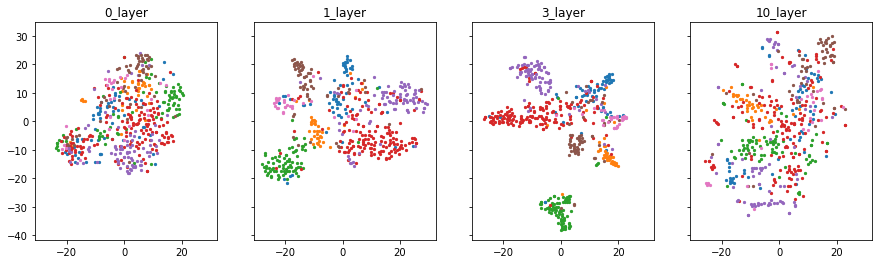

In [ ]:
visualise(feature_dict)

## Part 2. Skip-Connections

In this section, we will investigate whether skip-connections can alleviate the effect of over-smoothing.

#### a. Task 5) Setup graph convolutional network with skip-connections
Define a SkipGCN class for node classification that takes five inputs: *input_dim*, *hid_dim*, *n_class*, *n_layers*, and *dropout_ratio*. Using **residual connection** is recommended, but you may also use other techniques, like **concatenation**.

- Note that the `forward` function should return a Tensor object: **logits** and the `generate_node_embeddings` fuction should return a Tensor object: **node_embeddings**, which is the representation of the last layer. 
- For the case when the *n_layers=0*, implement a single feed-forward network.
- Use `F.relu` and `F.dropout` at the end of each layer.


In [ ]:
class SkipGCN(nn.Module):
  def __init__(
      self,
      input_dim: int,
      hid_dim: int,
      n_classes: int,
      n_layers: int,
      dropout_ratio: float = 0.3):
    super(SkipGCN, self).__init__()
    """
    Args:
      input_dim: input feature dimension
      hid_dim: hidden feature dimension
      n_classes: number of target classes
      n_layers: number of layers
    """

    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

  def forward(self, X, A) -> torch.Tensor:
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

  def generate_node_embeddings(self, X, A) -> torch.Tensor:
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

  def param_init(self):
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

#### b. Repeat experiments and Visualise the embeddings

In [ ]:
torch.manual_seed(123) # set seed

In [ ]:
training_params['model_name'] = 'SkipGCN'

training_params["n_layers"] = 0
model_0_layer = train(training_params)

training_params["n_layers"] = 1
model_1_layer = train(training_params)

training_params["n_layers"] = 3
model_3_layer = train(training_params)

training_params["n_layers"] = 10
model_10_layer = train(training_params)

Early Stopped at epoch 9!!!
Best Val Accuracy: 58.0
Early Stopped at epoch 31!!!
Best Val Accuracy: 77.4
Early Stopped at epoch 21!!!
Best Val Accuracy: 79.8
Early Stopped at epoch 19!!!
Best Val Accuracy: 76.4


In [ ]:
feature_dict = {
    "0_layer": dimension_reduction(model_0_layer),
    "1_layer": dimension_reduction(model_1_layer),
    "3_layer": dimension_reduction(model_3_layer),
    "10_layer": dimension_reduction(model_10_layer),
}

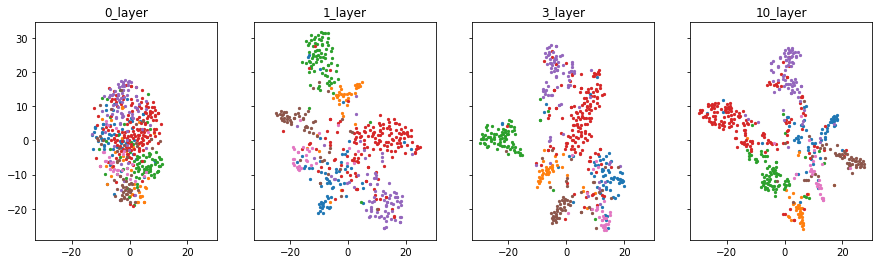

In [ ]:
visualise(feature_dict)

## Optional) Jumping Knowledge Connection

#### a. Task6) Design Graph Convolutional Network with Jumping Knowledge Connection
Define a `JumpKnowGCN` class for a node classification that takes five inputs: *input_dim*, *hid_dim*, *n_class*, *n_layers*, and *dropout_ratio*. Using `max_pooling` is recommended but you may also use other differentiable functions.

- Note that the `forward` function should return a Tensor object: **logits** and the `generate_node_embeddings` fuction should return a Tensor object: **node_embeddings**, which is the representation of the last layer. 
- For the case when the *n_layers=0*, implement a single feed-forward network.
- Use `relu` and `dropout` at the end of each layer.


In [ ]:
class JumpKnowGCN(nn.Module):
  def __init__(
      self,
      input_dim: int,
      hid_dim: int,
      n_classes: int,
      n_layers: int,
      dropout_ratio: float = 0.3):
    super(JumpKnowGCN, self).__init__()
    """
    Args:
      input_dim: input feature dimension
      hid_dim: hidden feature dimension
      n_classes: number of target classes
      n_layers: number of layers
      dropout_ratio: dropout ratio
    """
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

  def forward(self, X, A) -> torch.Tensor:
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

  def generate_node_embeddings(self, X, A) -> torch.Tensor:
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

  def param_init(self):
    ## ------ Begin Solution ------ ##
    
    ## ------ End Solution ------ ##

#### b. Repeat experiments and Visualise the embeddings

In [ ]:
training_params['model_name'] = 'JumpKnowGCN'
torch.manual_seed(123)

training_params["n_layers"] = 0
model_0_layer = train(training_params)

training_params["n_layers"] = 1
model_1_layer = train(training_params)

training_params["n_layers"] = 3
model_3_layer = train(training_params)

training_params["n_layers"] = 10
model_10_layer = train(training_params)

Early Stopped at epoch 9!!!
Best Val Accuracy: 58.0
Early Stopped at epoch 31!!!
Best Val Accuracy: 77.4
Early Stopped at epoch 27!!!
Best Val Accuracy: 79.2
Early Stopped at epoch 21!!!
Best Val Accuracy: 79.6


In [ ]:
feature_dict = {
    "0_layer": dimension_reduction(model_0_layer),
    "1_layer": dimension_reduction(model_1_layer),
    "3_layer": dimension_reduction(model_3_layer),
    "10_layer": dimension_reduction(model_10_layer),
}

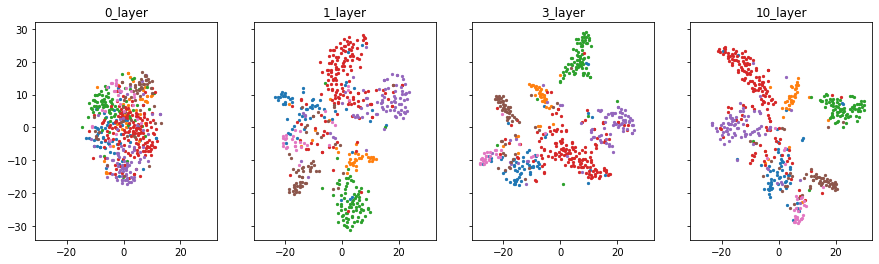

In [ ]:
visualise(feature_dict)